# Model project: *Over Lapping Generational Model*

Imports and set magics:

In [131]:
# (a) Import python modules
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace
import matplotlib.pyplot as plt
import ipywidgets as widgets

# (b) autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# (c) import models
import analytical as ana
import nummerical as num

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Introduction to the model**

In my model project, I have chosen to examine an *Over Lapping Generational* model (OLG model), which is a long run growth model that accounts for consumer preferences. 

In the model, the agents live for two periods: *t* and *t+1*, while the government has infitnite horizons. The agents are divided into the young generation and and the old generation, and their consumption is given by $C_{1t}$ and $C_{2t+1}$, respectively.

Time is discrete and indexed by $t\epsilon (0, 1, 2, ...)$

The OLG model presents two frameworks:

* The first framework is based on private savings, so all generations save for their own retirement. This framework is called *fully funded*.

* The second framework is a *pay-as-you-go system* (payg), where the young generation pays for the old generation's retirement. The major challenge with this system occurs, when the young generation is smaller than the old generation, which is the current case in Denmark.

Since Denmark is based on a PAYG-system, I will examine this system in the following analysis:

## **Model description**

### *Population*


Population is given by: 

$$
\begin{aligned}
L_t=L_{t-1}(1+n)
\end{aligned}
$$

$L_t$ denotes the current young generation

$L_{t-1}$ is the old generation who are still alive in the current period

$n$ = growth rate

#### *Consumer's utility function*

The consumers maximize their utility from their income. Notice that the consumers face a trade-off when decide whether to consume now and save later or vice versa.


$$
\begin{aligned} 
U_t = log(c_{1t}) + \beta log(c_{2t+1})\\
\beta =\frac{1}{1+{\rho}}
\end{aligned}
$$

### *Budget contraints (BC)*

As described in the introduction, only the young generation works, while the old generation is retired. Do to the PAYG-structure, the young generation is subject to income taxation ($\tau$). Furthermore, the young generation saves some of their income for their retirement ($s_t$).

The old generation consumes their savings (plus the interest income from their savings) and the public retirement ($d_{t+1}$)

$$
\begin{aligned}
&c_{1t} = w_t(1-\tau) - s_t\\
&c_{2t+1} = (1+r_{t+1})s_t + (1+n)d_{t+1}
\end{aligned} 
$$





### *Consumer's maximization problem*

The young generation's maximization problem is as follows:

$$
\begin{aligned} 
U_t = log(c_{1t}) + \beta log(c_{2t+1})\\
st.\\
c_{1t} = w_t(1-\tau) - s_t\\
c_{2t+1} = (1+r_{t+1})s_t + (1+n)d_{t+1}
\end{aligned}
$$

### *Firms*

In the model, firms operate according to a Cobb Douglas productin function. This implies that only capital $(K_t)$ and labour $(L_t)$ are input factors in the production function. $\alpha$ is the share of output that goes to capital and so $(1-\alpha)$ goes to labour
$$\begin{aligned}
 Y_t = K_t^{\alpha}L_t^{1-\alpha}
\end{aligned} 
$$ 


Based on the assumption that capital decressiated completely each period $(\delta=1)$, firm's maximization problems is as follows:


$$
\begin{aligned}
 max \Pi  = K_t^{\alpha}L_t^{1-\alpha} - r_tK_t - w_tL_t
\end{aligned} 
$$ 

## **Analytical solution**

First of all, I import my OLG model from my py-file:

In [132]:
# (a) Importing the OLG-model for analytical solution
model_a = ana.OLGmodelanalytical()
par = model.par

Secondly, I print the **Euler Equation**:

In [133]:
# (a) Consumer's utility function
print('Consumers utility function:')
display(sm.Eq(par.Ut, model_a.utility()))


# (b) IBC
print('Intertemporal budget constraint:')
display(sm.Eq(0, model_a.consumerBC()))


# (c) Euler equation
print('The Euler Equation:')
model_a.eulerequation()

Consumers utility function:


Eq(U_t, beta*log(c_{2t+1}) + log(c_{1t}))

Intertemporal budget constraint:


Eq(0, c_{1t} + s_t - w_t*(1 - tau))

The Euler Equation:


SympifyError: SympifyError: []

Thirdly, I find the **optimal saving rate** by substituting the Euler Equation into the BC. The optimal saving rate, $(s_t)$ is determined by the consumer's preferences.

In [ ]:
# (a) Optimal savings
print('Optimal saving:')
display(sm.Eq(par.st, model_a.Optimalsaving()))

Optimal saving:


AttributeError: 'OLGmodelanalytical' object has no attribute 'eulersequation'

Then, I use the optimal saving rate to find the **steady state for capital**. I do this by subtituting the optimal savings into the expression for $k_{t+1}$, inserting FOC and solve for $k^*$

In [ ]:
# (a) Law of motion
print('Law of motion for capital per worker:')
display(model_a.capitalacc()[0])

# Steady state for capital
print('Steady state for capital per worker:')
display(model_a.capitalacc()[1])

Law of motion for capital per worker:


TypeError: 'Equality' object is not subscriptable

Finally, I plot in some realistic parameters to find steady state for capital: 

In [ ]:
# (a) Defining parameter
alpha_ = 0.3
beta_ = 0.5
n_ = 0.0
tau_ = 0
A_ = 15

# (b) Lambda function
k_ss_ = sm.lambdify(args=(par.alpha, par.beta, par.n, par.tau, par.A), expr=model.capitalacc()[2])

# (c) Optimal capital
print('Optimal captial')
ana_result = k_ss_(alpha_, beta_, n_, tau_, A_)
print(ana_result)

The result shows the level of capital per worker when consumers optimize their utility

## **Nummerical solution**

I use my findings from the analytical part to find the steady state level of capital. I use a numerical optimization to find the steady state.

In [134]:
# (a) Importing the nummerical model
model_n = num.OLGmodelnummerical()

How, I plot the optimal level of capital in the transition curve:

TypeError: transitioncurve() takes 1 positional argument but 2 were given

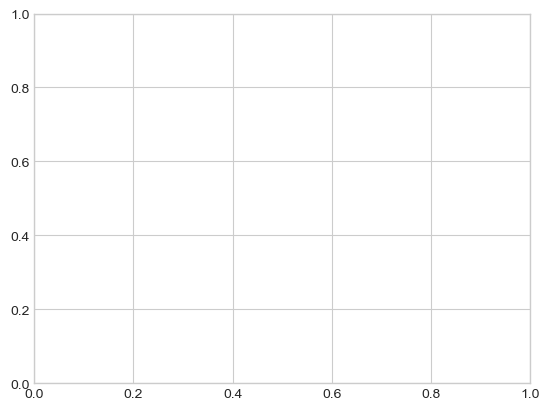

In [141]:
# (a) Optimal capital level per worker
model_n.transitioncurve()

# (b) Defining the figure
figure1 = plt.figure()
ax = figure1.add_subplot(1,1,1)

# (c) Adjusting the figure
model_n.transitioncurve(ax)
model_n.fourtyfive_curve(ax)
plt.plot(model_n.ss, model_n.ss)
plt.annotate(f'$k^*$ = {model_n.ss:.3f}', (model_n.ss-2, model_n.ss+1), size=12)

plt.title('')
ax.spines['bottom'].set_linewidth(3)
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

# iv. Display figure
plt.show()
